# 데이터 불러오기

- 2019년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 상반기, 하반기 주유소 가격 데이터 조회
up = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv')
dn = pd.read_csv('data/2019년 하반기 주유소 판매가격.csv')

In [3]:
# 상반기, 하반기 DataFrame 합치기
df = pd.concat([up, dn], ignore_index=True)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


In [4]:
# DataFrame 기본 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.3+ MB


In [5]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [6]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [7]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출)
a = df['지역'].str.slice(3)
df.drop(columns=['지역'], inplace=True)
df.insert(1, '구', a)
df

,번호,구,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


In [8]:
# 기간 컬럼을 datetime 타입으로 변경
df['기간'] = pd.to_datetime(df['기간'], format='%Y%m%d')
df

,번호,구,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0
1,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0
2,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0
3,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0
4,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-27,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-28,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-29,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-30,GS칼텍스,셀프,0,1540,1389,1100


In [9]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성
m = df['기간'].dt.month
d = df['기간'].dt.day
w = df['기간'].dt.weekday
df.drop(columns=['기간'], inplace=True)
df.insert(4, '월', m)
df.insert(5, '일', d)
df.insert(6, '요일', w)
df

,번호,구,상호,주소,월,일,요일,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,1,1,SK에너지,셀프,1673,1465,1365,0
1,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,2,2,SK에너지,셀프,1673,1465,1365,0
2,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,3,3,SK에너지,셀프,1673,1465,1365,0
3,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,4,4,SK에너지,셀프,1673,1465,1365,0
4,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,5,5,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,12,27,4,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,12,28,5,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,12,29,6,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,12,30,0,GS칼텍스,셀프,0,1540,1389,1100


In [10]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경
df['요일'] = df['요일'].apply(lambda x: '월화수목금토일'[x])
df

,번호,구,상호,주소,월,일,요일,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,1,화,SK에너지,셀프,1673,1465,1365,0
1,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,2,수,SK에너지,셀프,1673,1465,1365,0
2,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,3,목,SK에너지,셀프,1673,1465,1365,0
3,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,4,금,SK에너지,셀프,1673,1465,1365,0
4,A0006039,강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1,5,토,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,12,27,금,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,12,28,토,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,12,29,일,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,12,30,월,GS칼텍스,셀프,0,1540,1389,1100


In [11]:
# 휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('휘발유', ascending=False).head()

,번호,구,상호,주소,월,일,요일,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
177210,A0000767,중구,서남주유소,서울 중구 통일로 30,9,24,화,SK에너지,일반,2649,2356,2196,0
177216,A0000767,중구,서남주유소,서울 중구 통일로 30,9,30,월,SK에너지,일반,2699,2356,2196,0
177217,A0000767,중구,서남주유소,서울 중구 통일로 30,10,1,화,SK에너지,일반,2699,2356,2196,0
177211,A0000767,중구,서남주유소,서울 중구 통일로 30,9,25,수,SK에너지,일반,2649,2356,2196,0
177212,A0000767,중구,서남주유소,서울 중구 통일로 30,9,26,목,SK에너지,일반,2699,2356,2196,0


In [12]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['휘발유'] != 0].sort_values('휘발유').head() # 또는 df.query('휘발유 != 0').sort_values('휘발유').head()

,번호,구,상호,주소,월,일,요일,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
13148,A0033328,강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2,7,목,SK에너지,셀프,1788,1255,1155,0
82475,A0000605,은평구,삼융주유소,서울 은평구 수색로 299 (수색동),1,31,목,SK에너지,일반,0,1260,1160,0
82474,A0000605,은평구,삼융주유소,서울 은평구 수색로 299 (수색동),1,30,수,SK에너지,일반,0,1260,1160,0
82476,A0000605,은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2,1,금,SK에너지,일반,0,1260,1160,0
82998,A0000690,은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),1,26,토,GS칼텍스,셀프,0,1265,1165,0


In [13]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('고급휘발유', ascending=False).head()

,번호,구,상호,주소,월,일,요일,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
177217,A0000767,중구,서남주유소,서울 중구 통일로 30,10,1,화,SK에너지,일반,2699,2356,2196,0
177212,A0000767,중구,서남주유소,서울 중구 통일로 30,9,26,목,SK에너지,일반,2699,2356,2196,0
177213,A0000767,중구,서남주유소,서울 중구 통일로 30,9,27,금,SK에너지,일반,2699,2356,2196,0
177214,A0000767,중구,서남주유소,서울 중구 통일로 30,9,28,토,SK에너지,일반,2699,2356,2196,0
177215,A0000767,중구,서남주유소,서울 중구 통일로 30,9,29,일,SK에너지,일반,2699,2356,2196,0


In [14]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['고급휘발유'] != 0].sort_values('고급휘발유').head() # 또는 df.query('고급휘발유 != 0').sort_values('고급휘발유').head()

,번호,구,상호,주소,월,일,요일,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
17460,A0000520,강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),1,15,화,S-OIL,셀프,1397,1275,1175,0
17459,A0000520,강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),1,14,월,S-OIL,셀프,1397,1275,1175,0
17458,A0000520,강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),1,13,일,S-OIL,셀프,1397,1275,1175,0
17457,A0000520,강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),1,12,토,S-OIL,셀프,1397,1275,1175,0
17456,A0000520,강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),1,11,금,S-OIL,셀프,1397,1275,1175,0


In [15]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values('경유', ascending=False).head()

,번호,구,상호,주소,월,일,요일,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
177211,A0000767,중구,서남주유소,서울 중구 통일로 30,9,25,수,SK에너지,일반,2649,2356,2196,0
177212,A0000767,중구,서남주유소,서울 중구 통일로 30,9,26,목,SK에너지,일반,2699,2356,2196,0
177217,A0000767,중구,서남주유소,서울 중구 통일로 30,10,1,화,SK에너지,일반,2699,2356,2196,0
177216,A0000767,중구,서남주유소,서울 중구 통일로 30,9,30,월,SK에너지,일반,2699,2356,2196,0
177215,A0000767,중구,서남주유소,서울 중구 통일로 30,9,29,일,SK에너지,일반,2699,2356,2196,0


In [16]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['경유'] != 0].sort_values('경유').head() # 또는 df.query('경유 != 0').sort_values('경유').head()

,번호,구,상호,주소,월,일,요일,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
13148,A0033328,강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2,7,목,SK에너지,셀프,1788,1255,1155,0
50707,A0011826,서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,1,13,일,알뜰(ex),셀프,0,1297,1157,0
82476,A0000605,은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2,1,금,SK에너지,일반,0,1260,1160,0
82475,A0000605,은평구,삼융주유소,서울 은평구 수색로 299 (수색동),1,31,목,SK에너지,일반,0,1260,1160,0
82474,A0000605,은평구,삼융주유소,서울 은평구 수색로 299 (수색동),1,30,수,SK에너지,일반,0,1260,1160,0


In [17]:
# 상표별 휘발유 평균가격 조회
bg = df.groupby('상표')['휘발유'].mean().sort_values()
bg

상표
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
NH-OIL    1449.088889
자가상표      1492.085540
현대오일뱅크    1515.458244
S-OIL     1532.302882
GS칼텍스     1564.029014
SK에너지     1612.147153
Name: 휘발유, dtype: float64

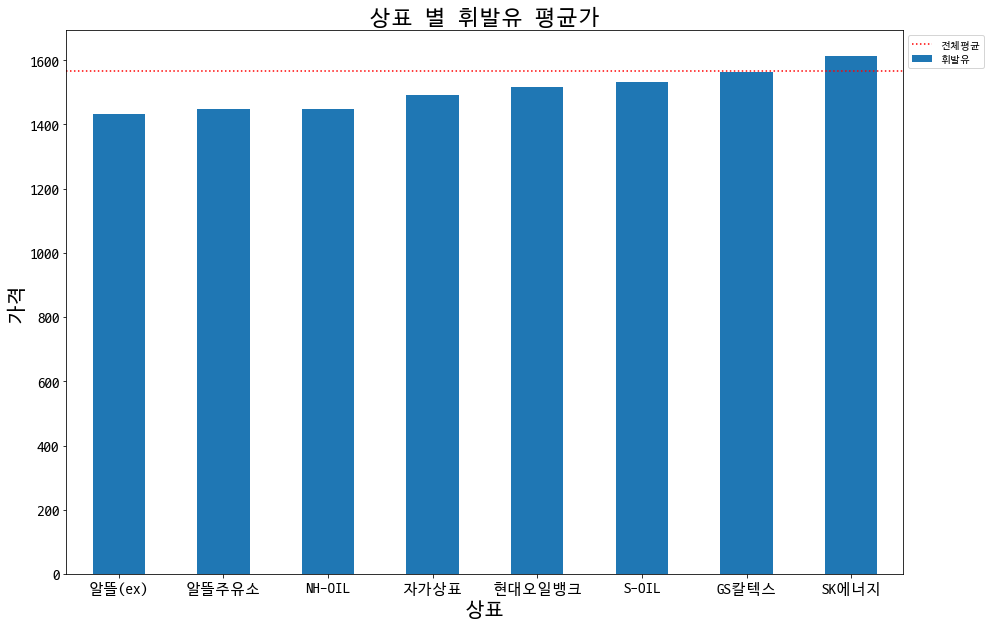

In [18]:
# 상표별 휘발유 평균가격 시각화
tm = df['휘발유'].mean() # 전체 휘발유 평균
bg.plot(kind='bar', figsize=(15,10), rot=0)
plt.axhline(y=tm, color='r', label='전체평균', linestyle=':') # 전체 평균에 대한 수평성 생성
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('상표 별 휘발유 평균가', fontsize=22)
plt.xlabel('상표')
plt.ylabel('가격')
plt.show()

In [19]:
# 셀프주유소와 일반주유소 개수 확인
df[['상호', '주소', '셀프여부']].drop_duplicates()['셀프여부'].value_counts()

일반    306
셀프    206
Name: 셀프여부, dtype: int64

In [20]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
df.groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1490.160266
일반    1619.107824
Name: 휘발유, dtype: float64

In [21]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
df.groupby(['상표', '셀프여부'])['휘발유'].mean()

상표      셀프여부
GS칼텍스   셀프      1481.410074
        일반      1610.060123
NH-OIL  일반      1449.088889
S-OIL   셀프      1481.437428
        일반      1579.451162
SK에너지   셀프      1504.853863
        일반      1690.377765
알뜰(ex)  셀프      1431.347945
알뜰주유소   셀프      1434.726027
        일반      1455.372511
자가상표    셀프      1494.409449
        일반      1491.740351
현대오일뱅크  셀프      1483.546767
        일반      1534.254225
Name: 휘발유, dtype: float64

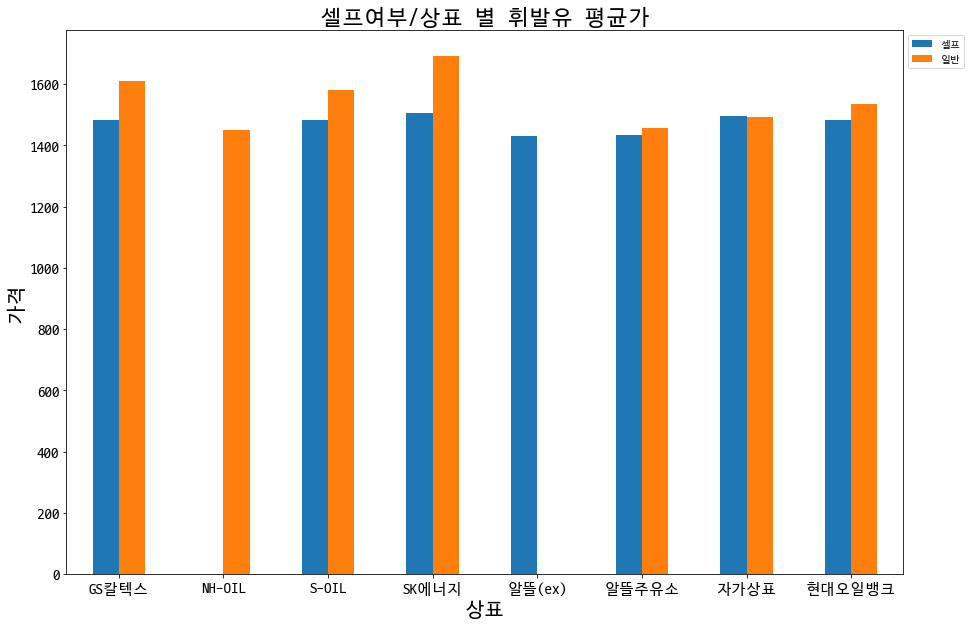

In [22]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
bsg = df.pivot_table(index='상표', columns='셀프여부', values='휘발유', aggfunc='mean')
bsg.plot(kind='bar', figsize=(15,10), rot=0)
plt.title('셀프여부/상표 별 휘발유 평균가', fontsize=22)
plt.xlabel('상표')
plt.ylabel('가격')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

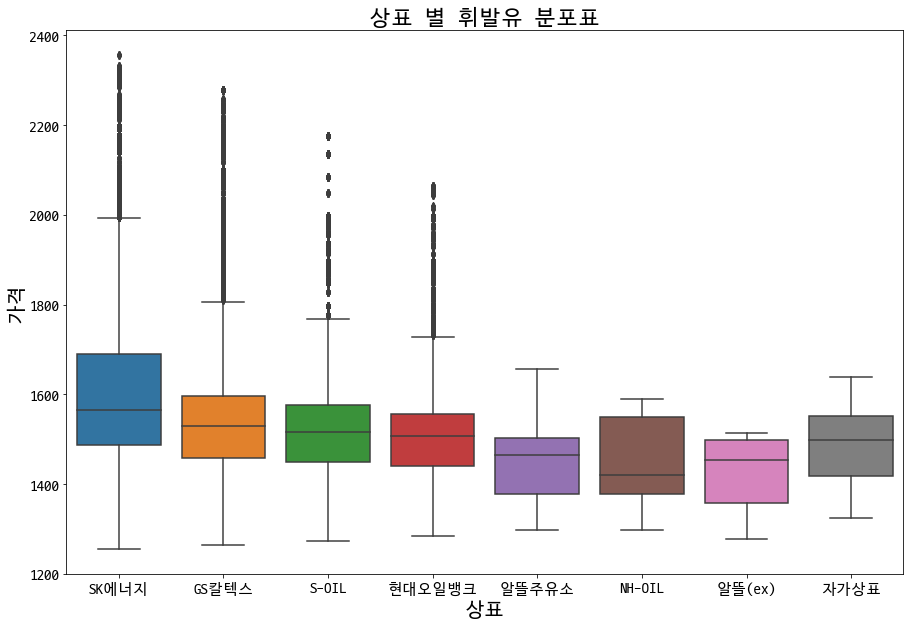

In [23]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
plt.figure(figsize=(15,10))
sns.boxplot(x='상표', y='휘발유', data=df.query('휘발유 != 0'))
plt.title('상표 별 휘발유 분포표', fontsize=22)
plt.xlabel('상표')
plt.ylabel('가격')
plt.show()

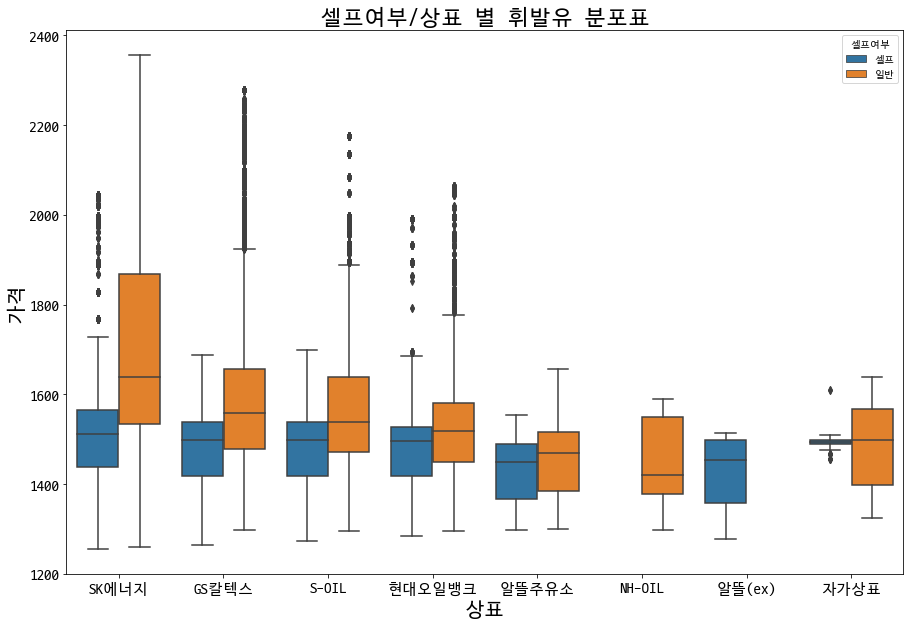

In [24]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
plt.figure(figsize=(15,10))
sns.boxplot(x='상표', y='휘발유', hue='셀프여부', data=df.query('휘발유 != 0'))
plt.title('셀프여부/상표 별 휘발유 분포표', fontsize=22)
plt.xlabel('상표')
plt.ylabel('가격')
plt.show()

In [25]:
# 구별 휘발유 가격의 평균
df.groupby('구')['휘발유'].mean()

구
강남구     1713.093581
강동구     1576.685264
강북구     1453.517525
강서구     1488.818088
관악구     1518.128564
광진구     1490.597054
구로구     1525.410383
금천구     1477.121992
노원구     1531.221551
도봉구     1494.171062
동대문구    1506.833542
동작구     1512.470911
마포구     1689.755616
서대문구    1528.943332
서초구     1577.131304
성동구     1583.659561
성북구     1507.948267
송파구     1518.957954
양천구     1512.890261
영등포구    1568.279506
용산구     1882.049825
은평구     1481.964026
종로구     1838.554945
중구      1976.948052
중랑구     1469.009092
Name: 휘발유, dtype: float64

In [26]:
# 중구(평균이 가장높음)의 상표별 휘발유 평균가격
df[df['구']=='중구'].groupby('상표')['휘발유'].mean()

상표
GS칼텍스     2091.866438
S-OIL     1783.369863
SK에너지     2060.617512
알뜰주유소     1601.552743
자가상표      1418.859375
현대오일뱅크    1711.669903
Name: 휘발유, dtype: float64

In [27]:
# 월 평균 휘발유 가격의 평균
df.groupby('월')['휘발유'].mean()

월
1     1466.554672
2     1446.624956
3     1465.159889
4     1519.481056
5     1606.096255
6     1605.343367
7     1585.726529
8     1589.339464
9     1633.125891
10    1634.464547
11    1620.687606
12    1630.535819
Name: 휘발유, dtype: float64

In [28]:
# 각 구의 월별 평균 휘발유 가격 
gmg = df.pivot_table(index='월', columns='구', values='휘발유', aggfunc='mean', margins=True)
gmg

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,All
월,,,,,,,,,,,,,,,,,,,,,
1,1619.865825,1503.383302,1357.002488,1376.357474,1429.822262,1379.168459,1418.589124,1360.297767,1406.245161,1373.606112,...,1403.604488,1417.573361,1404.158915,1486.227823,1781.412903,1363.895636,1749.433692,1848.913978,1360.405242,1466.554672
2,1600.945536,1478.109244,1345.565934,1370.397959,1405.984127,1362.851190,1408.949675,1337.986264,1397.600000,1365.634951,...,1386.097027,1406.561503,1389.676991,1454.418527,1739.352645,1330.018908,1730.007937,1848.380952,1343.332589,1446.624956
3,1616.143548,1468.138277,1342.990074,1392.716129,1403.370510,1388.360215,1427.221408,1371.192982,1421.683871,1390.093190,...,1397.505865,1421.064581,1415.321622,1466.712551,1806.438710,1367.174573,1741.992832,1870.634409,1364.818376,1465.159889
4,1666.350000,1526.341667,1414.246154,1447.910749,1456.301230,1451.507407,1477.038052,1438.646154,1484.722222,1451.424861,...,1450.840909,1464.520334,1479.093793,1522.575000,1836.563474,1439.952941,1779.411111,1904.650000,1429.393333,1519.481056
5,1739.208232,1605.267206,1500.025126,1543.218433,1548.151210,1547.330341,1566.923642,1529.620347,1586.740175,1545.358423,...,1546.357771,1553.783620,1558.715561,1602.545363,1893.453362,1539.197343,1856.232975,1985.540845,1518.455914,1606.096255
6,1744.065833,1608.388309,1491.889744,1522.746425,1564.633333,1540.320370,1562.271212,1510.461538,1569.823661,1548.606679,...,1554.769697,1554.568300,1548.231283,1586.283473,1901.231111,1531.676529,1863.500000,2011.624242,1512.642222,1605.343367
7,1734.204712,1588.002020,1469.147132,1502.133396,1543.155242,1508.003584,1542.331378,1491.776675,1552.664516,1523.568696,...,1534.840176,1540.997980,1525.377261,1570.332659,1901.079570,1507.068311,1860.078853,2004.487603,1480.929293,1585.726529
8,1735.209040,1589.324597,1468.318408,1508.055028,1543.354839,1512.141818,1543.788856,1491.372208,1556.690323,1526.870968,...,1544.298969,1545.417339,1532.414729,1574.178427,1902.374194,1508.076046,1863.913978,2006.897849,1493.768145,1589.339464
9,1773.644167,1638.926931,1514.569231,1554.135693,1586.991649,1558.492278,1585.204545,1539.167526,1601.920000,1570.620387,...,1581.690363,1597.801463,1576.305195,1629.180396,1946.780761,1549.731373,1917.268199,2056.847222,1530.306250,1633.125891


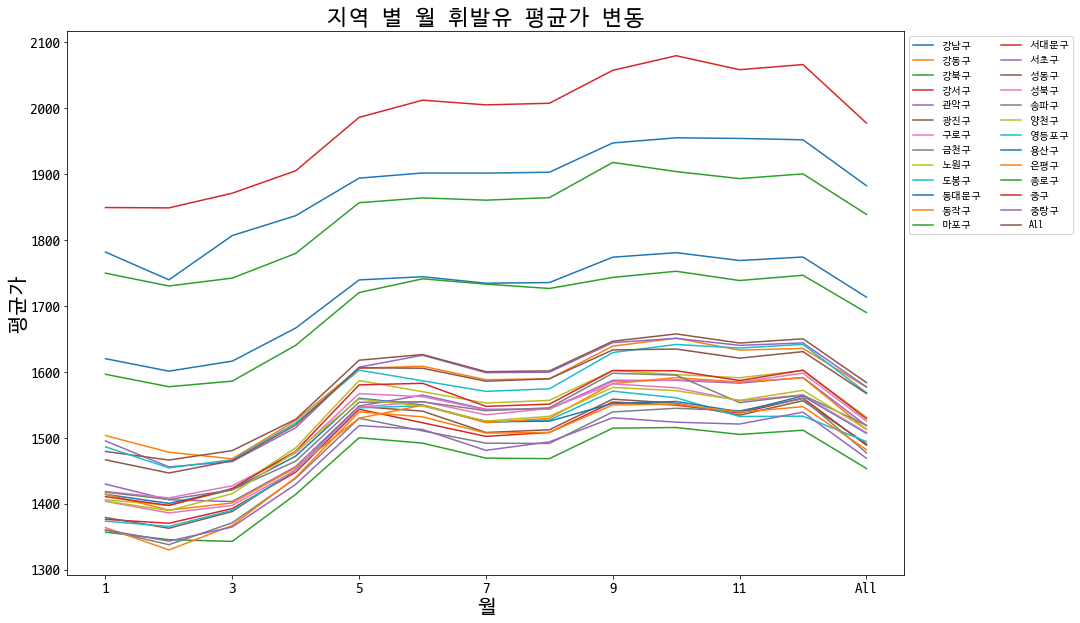

In [29]:
# 각 구의 월별 평균가격의 변화추이 시각화
gmg.plot(kind='line', figsize=(15,10), rot=0)
plt.title('지역 별 월 휘발유 평균가 변동', fontsize=22)
plt.xlabel('월')
plt.ylabel('평균가')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=2) # ncol= : 범례 다단 설정
plt.show()

In [30]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - 같은 주유소가 여러개 나오므로 평균 또는 max값으로 (평균 기준)
hgs = df.groupby('상호')['휘발유'].mean().sort_values(ascending=False).head() # 또는 df.groupby('상호')['휘발유'].max().sort_values(ascending=False).head()
hgs

상호
서남주유소          2207.252055
장충주유소          2139.323288
뉴서울(강남)        2130.060274
SC(주) 역전주유소    2125.778082
필동주유소          2098.095890
Name: 휘발유, dtype: float64

In [31]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - 같은 주유소가 여러개 나오므로 평균 또는 max값으로 (평균 기준)
lgs = df.groupby('상호')['휘발유'].mean().sort_values().head() # 또는 df.groupby('상호')['휘발유'].max().sort_values().head()
lgs

상호
(주)창원현대주유소           1362.553719
엘스카운티(주)천동주유소        1397.306452
SK네트웍스(주) 서울셀프주유소    1407.505051
KH에너지(주)직영 수명산주유소    1416.021739
이케이에너지㈜ 강산주유소        1416.290909
Name: 휘발유, dtype: float64

In [32]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates)
df.loc[df['상호'].isin(hgs.index), ['상호', '구', '주소']].drop_duplicates()

,상호,구,주소
2896,뉴서울(강남),강남구,서울 강남구 언주로 716 (논현동)
85869,SC(주) 역전주유소,중구,서울 중구 퇴계로 15
86231,서남주유소,중구,서울 중구 통일로 30
86955,장충주유소,중구,서울 중구 장충단로 202 (장충동1가)
87317,필동주유소,중구,서울 중구 퇴계로 196 (필동2가)


In [33]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
df.loc[df['상호'].isin(lgs.index), ['상호', '구', '주소']].drop_duplicates()

,상호,구,주소
9436,엘스카운티(주)천동주유소,강동구,서울 강동구 천호대로 987 (천호동)
13472,KH에너지(주)직영 수명산주유소,강서구,서울 강서구 남부순환로 195 (내발산동)
19607,SK네트웍스(주) 서울셀프주유소,관악구,서울 관악구 신림로 183 (신림동)
46052,(주)창원현대주유소,서대문구,서울 서대문구 통일로 537
61061,이케이에너지㈜ 강산주유소,성북구,서울 성북구 보문로 27 (보문동7가)


In [34]:
# 고급 휘발유를 가장 많이 파는 구 조회
df.query('고급휘발유 != 0').groupby('구')['고급휘발유'].count().sort_values(ascending=False)

구
강남구     12136
서초구      9400
용산구      5390
송파구      5099
강서구      4288
중구       3352
양천구      3004
영등포구     2653
성동구      2544
강동구      2511
성북구      2508
광진구      2337
종로구      2282
서대문구     2077
은평구      2021
마포구      1982
노원구      1825
도봉구      1458
관악구      1341
강북구      1234
동대문구     1093
동작구      1022
구로구       807
중랑구       730
금천구       364
Name: 고급휘발유, dtype: int64